In [1]:
from utils import *
from matplotlib import pyplot as plt

In [2]:
# generate object
setup = {
    'N': 8192*2,
    'L': 2e-3, # 1mm
    'lambda_0': 650e-9, # 650nm, red light
    'f1': 45e-3, # 45mm
    'f2': 25e-3, # 25mm
    'A': 5e-3, # 5mm
    'plot': True
}
n = setup['N']
sample_size = 4096
sample = test_sum(sample_size, a=255, n_cycles=50, sigma=0.1)
object = np.zeros(n, dtype=np.complex128)
object[n//2-sample_size//2:n//2+sample_size//2] = sample

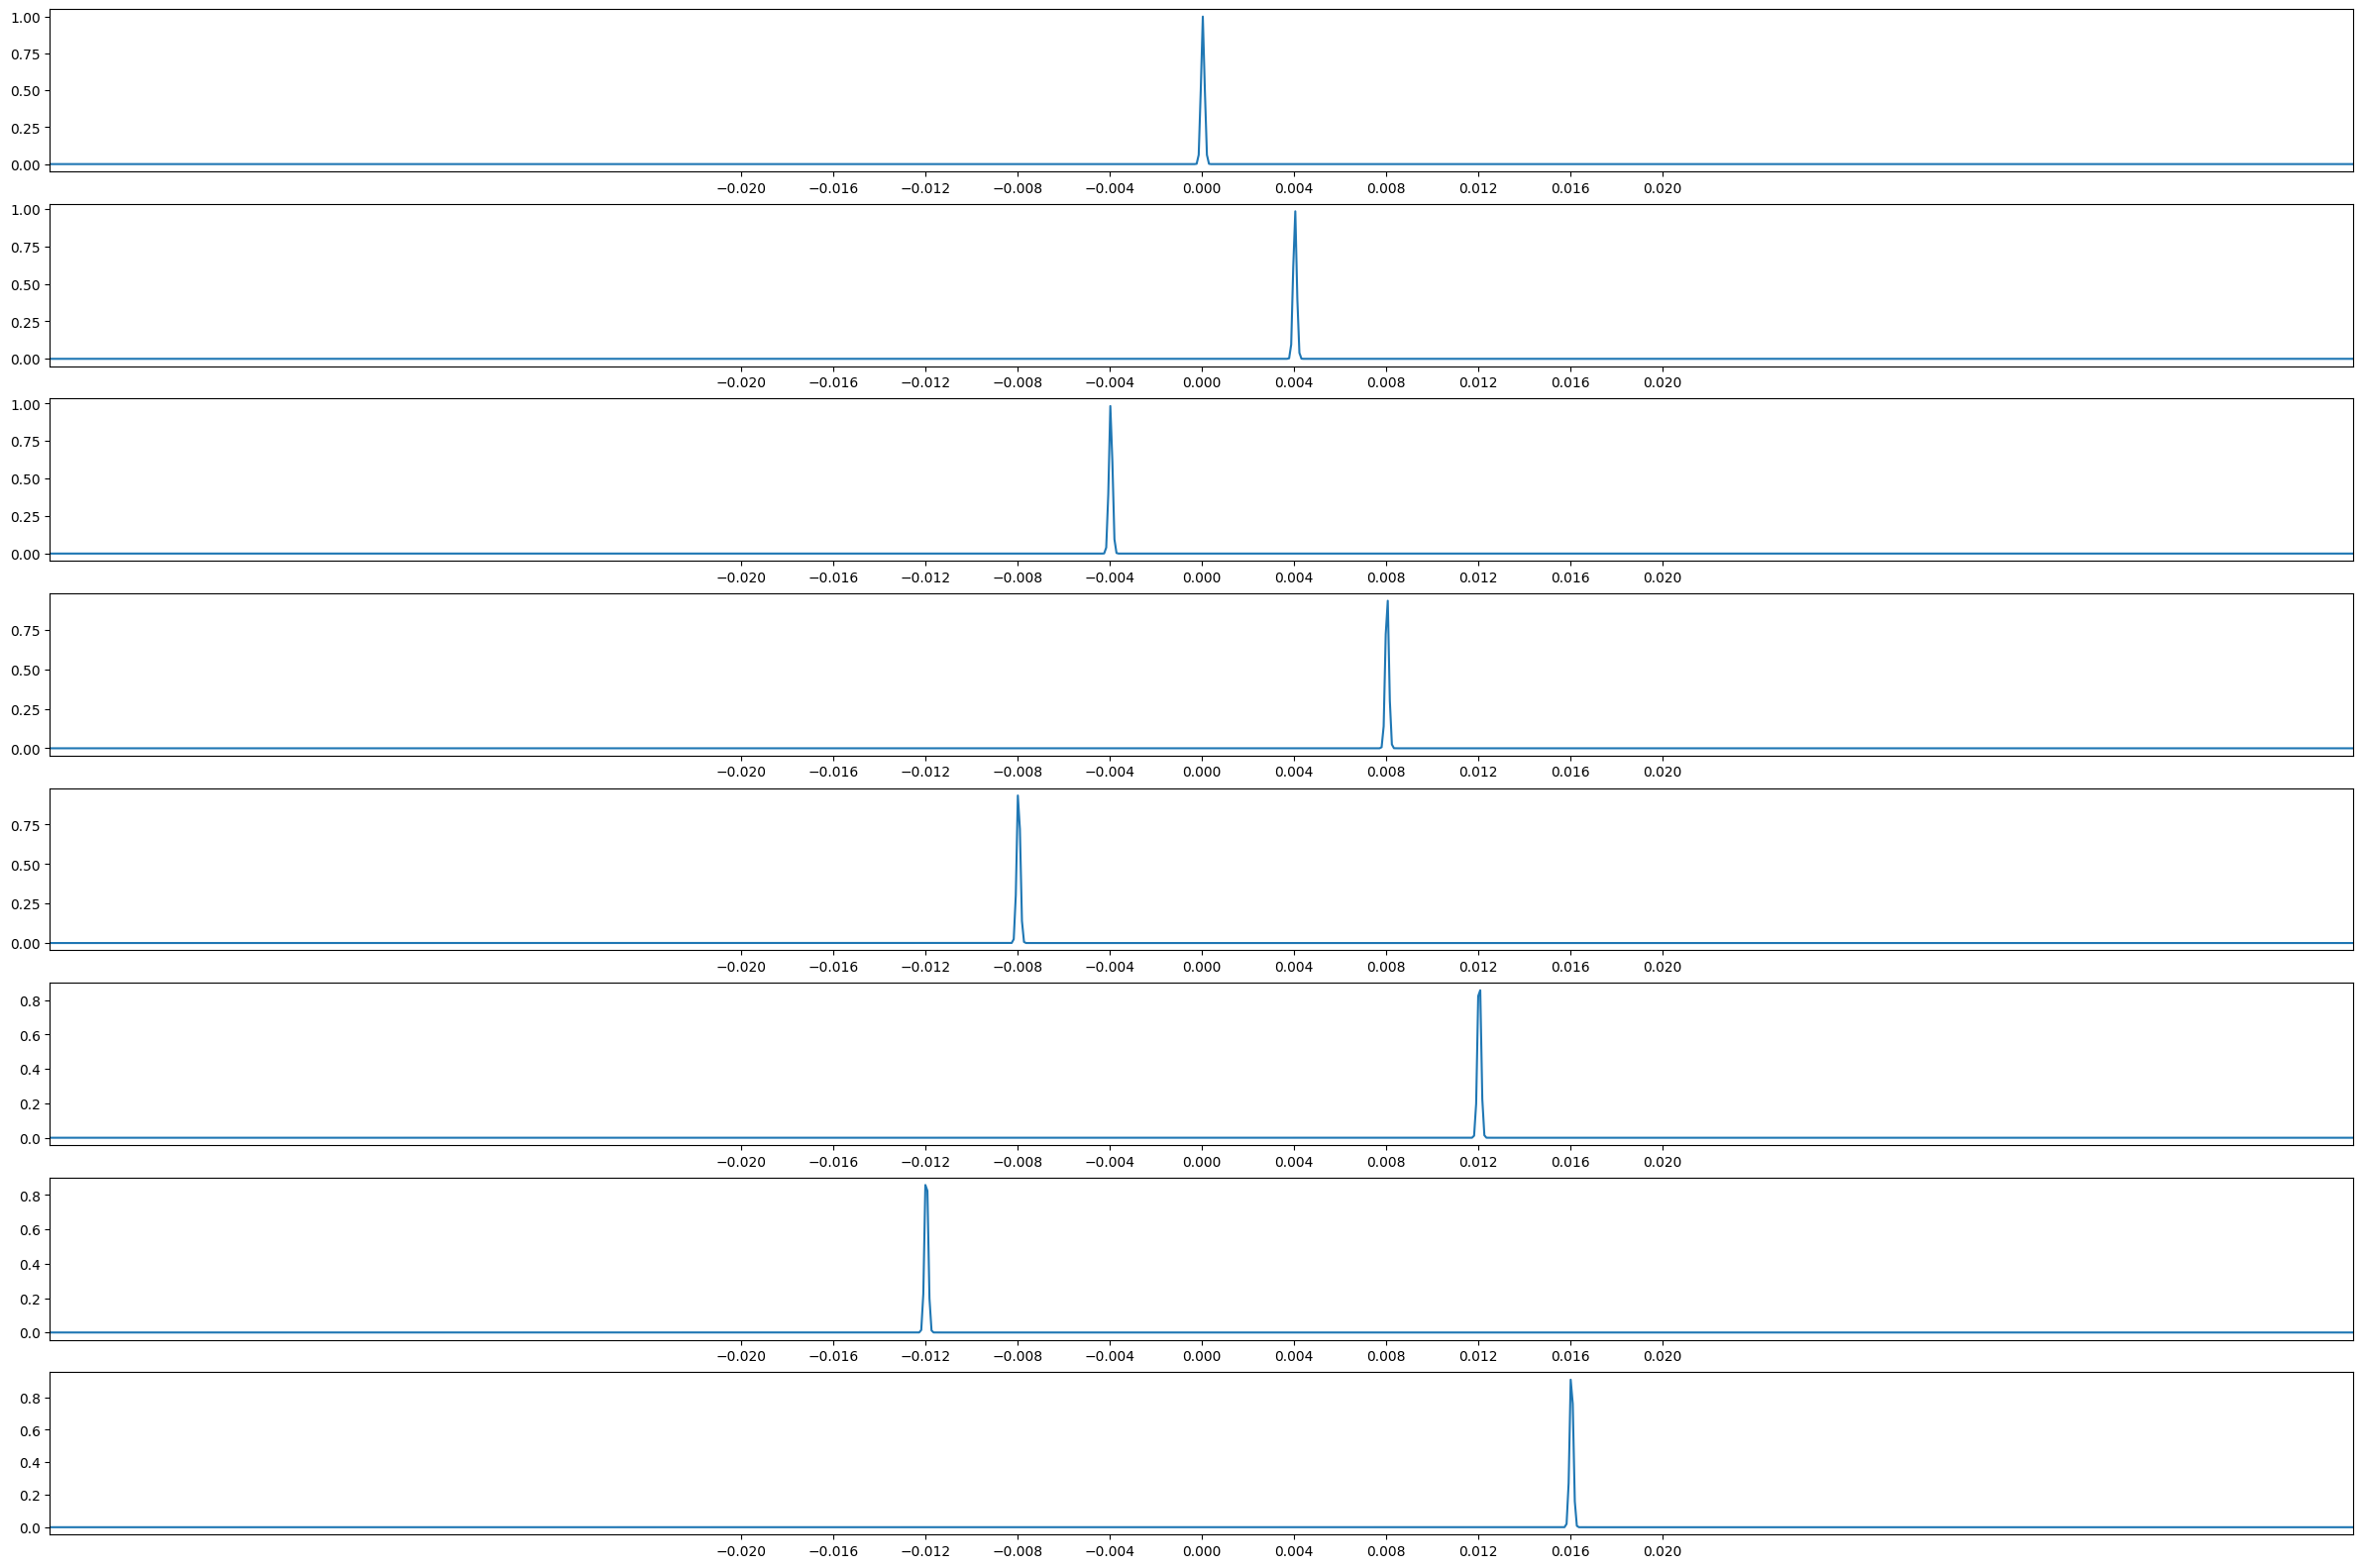

In [3]:
_, ax = plt.subplots(8, 1, figsize=(30, 20))
for i, x in enumerate(led_array(n_leds=32, spacing=4e-3)):
    if i == 8:
        break
    x_out, _ = propogate_field(x)
    x_field = np.zeros(n, dtype=np.complex128)
    x_field[n//2-5000//2:n//2+5000//2] = x_out
    object_field = x_field * object
    
    # output = image(object_field, setup)
    x_units = np.linspace(-0.223, 0.223, 5000)
    ax[i].plot(x_units, np.abs(x))
    ax[i].set_xticks([i*4e-3 for i in range(-5,6)])
    ax[i].set_xlim(-0.05, 0.05)